In [1]:
from tensorflow import keras

fashion_mnist = keras.datasets.fashion_mnist
(x_train_full, y_train_full), (x_test, y_test) = fashion_mnist.load_data()

print(x_train_full.shape, x_train_full.dtype)
print(x_test.shape, x_test.dtype)

VAL_SIZE = 4000

x_valid, x_train = x_train_full[:VAL_SIZE] / 255.0, x_train_full[VAL_SIZE:] / 255.0
y_valid, y_train = y_train_full[:VAL_SIZE], y_train_full[VAL_SIZE:]

# Перетворення 2D зображень у 1D вектори
x_train = x_train.reshape(-1, 28 * 28)
x_valid = x_valid.reshape(-1, 28 * 28)
x_test = x_test.reshape(-1, 28 * 28)

# Перетворення міток класів у one-hot encoding
y_train_one_hot = keras.utils.to_categorical(y_train, 10)
y_valid_one_hot = keras.utils.to_categorical(y_valid, 10)
y_test_one_hot = keras.utils.to_categorical(y_test, 10)

(60000, 28, 28) uint8
(10000, 28, 28) uint8


In [2]:
class_names = [
    'T-shirt',
    'Trouser',
    'Pullover',
    'Dress',
    'Coat',
    'Sandal',
    'Shirt',
    'Sneaker',
    'Bag',
    'Ankle boot'
]

class_names[y_train[0]], class_names[y_valid[0]]

('Bag', 'Ankle boot')

In [3]:
import tensorflow as tf

def create_model_relu():
    model = tf.keras.models.Sequential([
        tf.keras.layers.Dense(512, activation='relu', input_shape=(28*28,)),
        tf.keras.layers.Dense(256, activation='relu'),
        tf.keras.layers.Dense(128, activation='relu'),
        tf.keras.layers.Dense(10, activation='softmax')
    ])
    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
    return model

In [4]:
def create_model_tanh():
    model = tf.keras.models.Sequential([
        tf.keras.layers.Dense(256, activation='tanh', input_shape=(28*28,)),
        tf.keras.layers.Dense(128, activation='tanh'),
        tf.keras.layers.Dense(64, activation='tanh'),
        tf.keras.layers.Dense(10, activation='softmax')
    ])
    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
    return model

In [5]:
def create_model_selu():
    model = tf.keras.models.Sequential([
        tf.keras.layers.Dense(384, activation='selu', input_shape=(28*28,)),
        tf.keras.layers.Dense(192, activation='selu'),
        tf.keras.layers.Dense(96, activation='selu'),
        tf.keras.layers.Dense(10, activation='softmax')
    ])
    model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001), 
                  loss='categorical_crossentropy', 
                  metrics=['accuracy'])
    return model

In [6]:
import matplotlib.pyplot as plt
import pandas as pd

def train_and_plot(model, model_name, x_train, y_train, x_valid, y_valid):
    history = model.fit(x_train, y_train, epochs=10, validation_data=(x_valid, y_valid), batch_size=32, verbose=2)
    
    pd.DataFrame(history.history).plot(figsize=(8, 5))
    plt.grid(True)
    plt.gca().set_ylim(0, 1)
    plt.show()

    val_loss, val_acc = model.evaluate(x_valid, y_valid, verbose=0)
    print(f"Точність на валідаційних даних для {model_name}: {val_acc:.4f}")

C:\Users\Victoria\Desktop\4 курс\Засоби глибинного навчання\1.1\.venv\lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
1750/1750 - 11s - 6ms/step - accuracy: 0.8236 - loss: 0.4853 - val_accuracy: 0.8690 - val_loss: 0.3722
Epoch 2/10
1750/1750 - 10s - 6ms/step - accuracy: 0.8665 - loss: 0.3629 - val_accuracy: 0.8635 - val_loss: 0.4039
Epoch 3/10
1750/1750 - 9s - 5ms/step - accuracy: 0.8780 - loss: 0.3304 - val_accuracy: 0.8767 - val_loss: 0.3306
Epoch 4/10
1750/1750 - 10s - 5ms/step - accuracy: 0.8867 - loss: 0.3048 - val_accuracy: 0.8643 - val_loss: 0.3931
Epoch 5/10
1750/1750 - 10s - 5ms/step - accuracy: 0.8929 - loss: 0.2882 - val_accuracy: 0.8815 - val_loss: 0.3271
Epoch 6/10
1750/1750 - 10s - 6ms/step - accuracy: 0.8963 - loss: 0.2756 - val_accuracy: 0.8882 - val_loss: 0.3043
Epoch 7/10
1750/1750 - 10s - 6ms/step - accuracy: 0.9015 - loss: 0.2608 - val_accuracy: 0.8850 - val_loss: 0.3060
Epoch 8/10
1750/1750 - 9s - 5ms/step - accuracy: 0.9063 - loss: 0.2494 - val_accuracy: 0.8863 - val_loss: 0.3269
Epoch 9/10
1750/1750 - 9s - 5ms/step - accuracy: 0.9091 - loss: 0.2396 - val_accuracy: 0.8

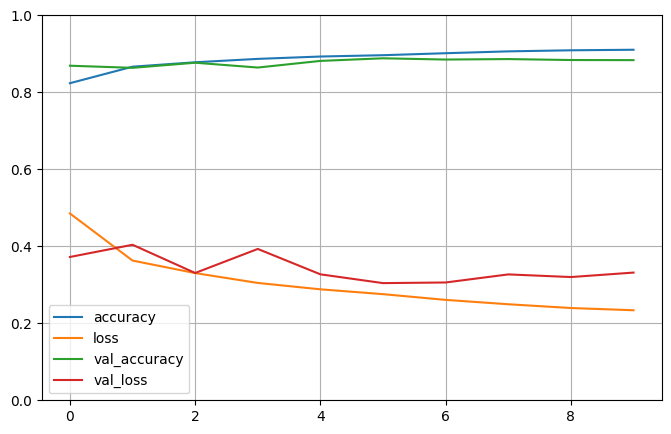

Точність на валідаційних даних для Модель 1: 0.8835


In [7]:
model_1 = create_model_relu()
train_and_plot(model_1, "Модель 1", x_train, y_train_one_hot, x_valid, y_valid_one_hot)

C:\Users\Victoria\Desktop\4 курс\Засоби глибинного навчання\1.1\.venv\lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
1750/1750 - 12s - 7ms/step - accuracy: 0.8253 - loss: 0.4823 - val_accuracy: 0.8447 - val_loss: 0.4464
Epoch 2/10
1750/1750 - 14s - 8ms/step - accuracy: 0.8651 - loss: 0.3700 - val_accuracy: 0.8620 - val_loss: 0.3764
Epoch 3/10
1750/1750 - 14s - 8ms/step - accuracy: 0.8765 - loss: 0.3391 - val_accuracy: 0.8770 - val_loss: 0.3323
Epoch 4/10
1750/1750 - 15s - 8ms/step - accuracy: 0.8809 - loss: 0.3214 - val_accuracy: 0.8708 - val_loss: 0.3461
Epoch 5/10
1750/1750 - 14s - 8ms/step - accuracy: 0.8862 - loss: 0.3064 - val_accuracy: 0.8810 - val_loss: 0.3372
Epoch 6/10
1750/1750 - 14s - 8ms/step - accuracy: 0.8906 - loss: 0.2946 - val_accuracy: 0.8740 - val_loss: 0.3328
Epoch 7/10
1750/1750 - 16s - 9ms/step - accuracy: 0.8926 - loss: 0.2839 - val_accuracy: 0.8810 - val_loss: 0.3324
Epoch 8/10
1750/1750 - 5s - 3ms/step - accuracy: 0.8968 - loss: 0.2798 - val_accuracy: 0.8748 - val_loss: 0.3323
Epoch 9/10
1750/1750 - 7s - 4ms/step - accuracy: 0.8984 - loss: 0.2708 - val_accuracy: 0.

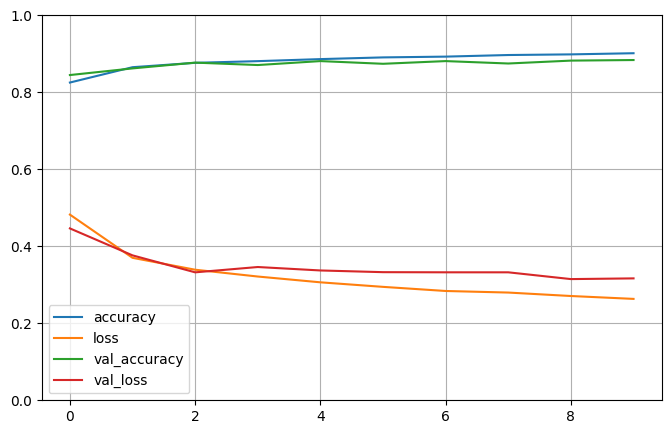

Точність на валідаційних даних для Модель 2: 0.8838


In [8]:
model_2 = create_model_tanh()
train_and_plot(model_2, "Модель 2", x_train, y_train_one_hot, x_valid, y_valid_one_hot)

C:\Users\Victoria\Desktop\4 курс\Засоби глибинного навчання\1.1\.venv\lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
1750/1750 - 10s - 6ms/step - accuracy: 0.8152 - loss: 0.5124 - val_accuracy: 0.8428 - val_loss: 0.4205
Epoch 2/10
1750/1750 - 8s - 5ms/step - accuracy: 0.8542 - loss: 0.3975 - val_accuracy: 0.8630 - val_loss: 0.3860
Epoch 3/10
1750/1750 - 7s - 4ms/step - accuracy: 0.8663 - loss: 0.3605 - val_accuracy: 0.8580 - val_loss: 0.3980
Epoch 4/10
1750/1750 - 8s - 5ms/step - accuracy: 0.8758 - loss: 0.3369 - val_accuracy: 0.8650 - val_loss: 0.3774
Epoch 5/10
1750/1750 - 7s - 4ms/step - accuracy: 0.8791 - loss: 0.3235 - val_accuracy: 0.8665 - val_loss: 0.3690
Epoch 6/10
1750/1750 - 8s - 5ms/step - accuracy: 0.8852 - loss: 0.3034 - val_accuracy: 0.8730 - val_loss: 0.3520
Epoch 7/10
1750/1750 - 9s - 5ms/step - accuracy: 0.8898 - loss: 0.2919 - val_accuracy: 0.8658 - val_loss: 0.3638
Epoch 8/10
1750/1750 - 9s - 5ms/step - accuracy: 0.8949 - loss: 0.2778 - val_accuracy: 0.8827 - val_loss: 0.3365
Epoch 9/10
1750/1750 - 9s - 5ms/step - accuracy: 0.8989 - loss: 0.2685 - val_accuracy: 0.8788 -

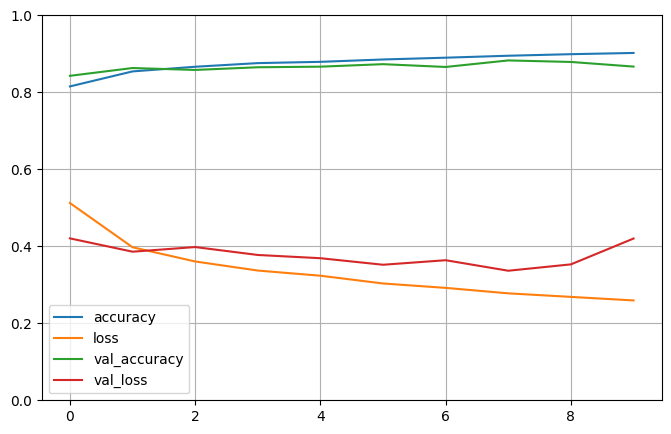

Точність на валідаційних даних для Модель 3: 0.8668


In [9]:
model_3 = create_model_selu()
train_and_plot(model_3, "Модель 3", x_train, y_train_one_hot, x_valid, y_valid_one_hot)

In [10]:
from sklearn.metrics import classification_report
import numpy as np

def classification_report_for_model(model, model_name):
    y_pred = model.predict(x_test)
    
    print(f"Звіт по класифікації для {model_name}:")
    print(classification_report(y_test, y_pred.argmax(axis=1), target_names=class_names))

In [11]:
classification_report_for_model(model_1, "Модель 1")
classification_report_for_model(model_2, "Модель 2")
classification_report_for_model(model_3, "Модель 3")

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step
Звіт по класифікації для Модель 1:
              precision    recall  f1-score   support

     T-shirt       0.77      0.89      0.82      1000
     Trouser       0.96      0.98      0.97      1000
    Pullover       0.81      0.70      0.75      1000
       Dress       0.92      0.84      0.88      1000
        Coat       0.64      0.92      0.75      1000
      Sandal       0.99      0.93      0.96      1000
       Shirt       0.77      0.43      0.56      1000
     Sneaker       0.95      0.95      0.95      1000
         Bag       0.95      0.98      0.97      1000
  Ankle boot       0.92      0.98      0.95      1000

    accuracy                           0.86     10000
   macro avg       0.87      0.86      0.86     10000
weighted avg       0.87      0.86      0.86     10000
313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step
Звіт по класифікації для Модель 2:
              precision    recall  f1-score   support

     T-shirt       0.87      0.77  

In [12]:
def classification_report_for_model(model, model_name, x_selected, y_selected):
    y_pred = model.predict(x_selected)
    
    print(f"Звіт по класифікації для {model_name}:")
    print(classification_report(y_selected, y_pred.argmax(axis=1), target_names=class_names))

In [13]:
import random

N_AMOUNT = 20
rand_indices = random.sample(range(x_test.shape[0]), k=N_AMOUNT)

x_selected = x_test[rand_indices]
y_selected = y_test[rand_indices]

x_selected, y_selected

(array([[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]], dtype=uint8),
 array([1, 8, 1, 6, 0, 6, 5, 7, 3, 4, 8, 5, 3, 8, 9, 2, 4, 5, 8, 7],
       dtype=uint8))

In [14]:
from sklearn.metrics import classification_report

def classification_report_for_model(model, model_name, x_selected, y_selected, class_names, labels):
    y_pred = model.predict(x_selected)
    
    # Print classification report with zero_division handling
    print(f"Звіт по класифікації для {model_name}:")
    print(classification_report(y_selected, y_pred.argmax(axis=1), target_names=class_names, labels=labels, zero_division=0))

# Example: Specify labels and class_names
labels = [0, 1, 2, 3, 4, 5, 6, 7]  # Adjust based on your actual classes
class_names = ["Class 0", "Class 1", "Class 2", "Class 3", "Class 4", "Class 5", "Class 6", "Class 7"]

classification_report_for_model(model_1, "Модель 1", x_selected, y_selected, class_names, labels)
classification_report_for_model(model_2, "Модель 2", x_selected, y_selected, class_names, labels)
classification_report_for_model(model_3, "Модель 3", x_selected, y_selected, class_names, labels)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step
Звіт по класифікації для Модель 1:
              precision    recall  f1-score   support

     Class 0       1.00      1.00      1.00         1
     Class 1       0.67      1.00      0.80         2
     Class 2       0.00      0.00      0.00         1
     Class 3       1.00      0.50      0.67         2
     Class 4       0.50      1.00      0.67         2
     Class 5       1.00      1.00      1.00         3
     Class 6       1.00      0.50      0.67         2
     Class 7       1.00      1.00      1.00         2

   micro avg       0.80      0.80      0.80        15
   macro avg       0.77      0.75      0.72        15
weighted avg       0.82      0.80      0.77        15
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step
Звіт по класифікації для Модель 2:
              precision    recall  f1-score   support

     Class 0       1.00      1.00      1.00         1
     Class 1       0.67      1.00      0.80         2
     Class 2       1.00      1.00      1.